In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


In [2]:
jugadores = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
rapidez = [0.58, 0.90, 0.68, 0.11, 0.47, 0.24, 0.09, 0.82, 0.65, 0.09, 0.98]
resistencia = [0.33, 0.11, 0.17, 0.44, 0.81, 0.83, 0.18, 0.11, 0.50, 0.63, 0.24]

tabla = np.column_stack((jugadores, rapidez, resistencia))

# Imprimir la tabla
headers = ["Jugador", "Rapidez", "Resistencia"]
print(tabulate(tabla, headers=headers, tablefmt="grid"))

+-----------+-----------+---------------+
|   Jugador |   Rapidez |   Resistencia |
+===========+===========+===============+
|         1 |      0.58 |          0.33 |
+-----------+-----------+---------------+
|         2 |      0.9  |          0.11 |
+-----------+-----------+---------------+
|         3 |      0.68 |          0.17 |
+-----------+-----------+---------------+
|         4 |      0.11 |          0.44 |
+-----------+-----------+---------------+
|         5 |      0.47 |          0.81 |
+-----------+-----------+---------------+
|         6 |      0.24 |          0.83 |
+-----------+-----------+---------------+
|         7 |      0.09 |          0.18 |
+-----------+-----------+---------------+
|         8 |      0.82 |          0.11 |
+-----------+-----------+---------------+
|         9 |      0.65 |          0.5  |
+-----------+-----------+---------------+
|        10 |      0.09 |          0.63 |
+-----------+-----------+---------------+
|        11 |      0.98 |         

+-----------+------------+------------+
|   Jugador |   cluster1 |   cluster2 |
+===========+============+============+
|         1 |  0.191567  |  0.808433  |
+-----------+------------+------------+
|         2 |  0.0376096 |  0.96239   |
+-----------+------------+------------+
|         3 |  0.0266079 |  0.973392  |
+-----------+------------+------------+
|         4 |  0.936633  |  0.0633667 |
+-----------+------------+------------+
|         5 |  0.791707  |  0.208293  |
+-----------+------------+------------+
|         6 |  0.92057   |  0.0794297 |
+-----------+------------+------------+
|         7 |  0.716645  |  0.283355  |
+-----------+------------+------------+
|         8 |  0.0224883 |  0.977512  |
+-----------+------------+------------+
|         9 |  0.314038  |  0.685962  |
+-----------+------------+------------+
|        10 |  0.977221  |  0.0227793 |
+-----------+------------+------------+
|        11 |  0.0563888 |  0.943611  |
+-----------+------------+------------+


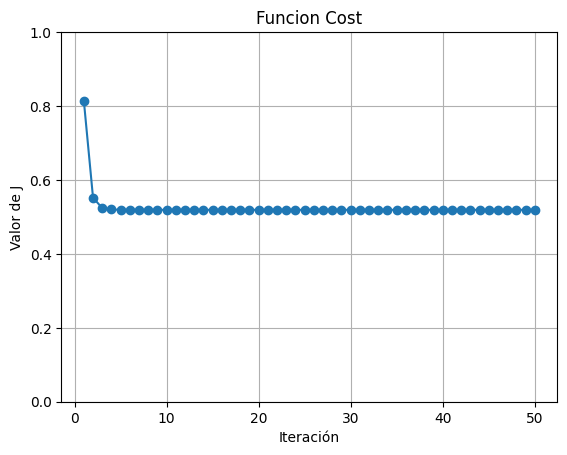

0.5191819381800139


In [5]:
iter = 50
membresia = np.zeros_like(tabla)
v1 = (0.2, 0.5)
v2 = (0.8, 0.5)
A = 0
J = []

for t in range(iter):
    A = 0
    for i in range(len(tabla)):
        x = tabla[i, 1:3]  # Extraer las coordenadas del primer punto de la tabla
        
        distancia1 = (x[0] - v1[0])**2 + (x[1] - v1[1])**2
        distancia2 = (x[0] - v2[0])**2 + (x[1] - v2[1])**2

        Mc1 = 1 / ((distancia1 / distancia1) + (distancia1 / distancia2))
        Mc2 = 1 / ((distancia2 / distancia1) + (distancia2 / distancia2))

        #membresia.append((i + 1, Mc1, Mc2))
        membresia[i] = (i + 1, Mc1, Mc2)

        A += ((Mc1**2 * distancia1) + (Mc2**2 * distancia2))

    J.append(A)    

    N1 = 0
    M1 = np.sum(np.array(membresia)[:, 1]**2)

    N2 = 0
    M2 = np.sum(np.array(membresia)[:, 2]**2)

    for i in range(len(tabla)):
        N1 += np.dot(membresia[i][1]**2, tabla[i, 1:3])
        N2 += np.dot(membresia[i][2]**2, tabla[i, 1:3])

    v1 = (N1[0] / M1, N1[1] / M1)
    v2 = (N2[0] / M2, N2[1] / M2)

headers = ["Jugador", "cluster1", "cluster2"]
print(tabulate(membresia, headers=headers, tablefmt="grid"))

x = np.arange(1, iter + 1)

# Graficar J en función del número de iteraciones
plt.plot(x, J, marker='o', linestyle='-')
plt.title('Funcion Cost')
plt.xlabel('Iteración')
plt.ylabel('Valor de J')
plt.ylim(0, 1)  # Limitar el eje y en el rango de 0 a 1
plt.grid(True)
plt.show()

print(J[len(J) - 1])